# Project: Convolutional Neural Network (CNN)
## Name: Hoang Anh (Benjamin) Nguyen
This Jupyter Notebook Starter File provides a basic outline for your solutions. For detailed instructions, please refer to the assignment on Canvas. Complete all your work for this project in this same Jupyter Notebook file, which you will submit:
- Code:
  - Insert your code where you see #Insert Code Here.
  - Ensure all code is well-commented and easy to understand.
  - Use clear and descriptive variable names.
- Questions:
  - You will be provided guided questions in a separate assignment vs. here in the code to give you the opportunity to demonstrate a deep understanding of the concepts through thorough explanations and critical thinking.

In [26]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models


#!pip install tensorflow_datasets #(optional if you need this installed, it is a separate library than the tensorflow
import tensorflow_datasets as tfds
import numpy as np



# The Dataset

In [27]:
# Load the Rock-Paper-Scissors dataset
(train_data, val_data, test_data), info = tfds.load(
    'rock_paper_scissors',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Data Preprocessing

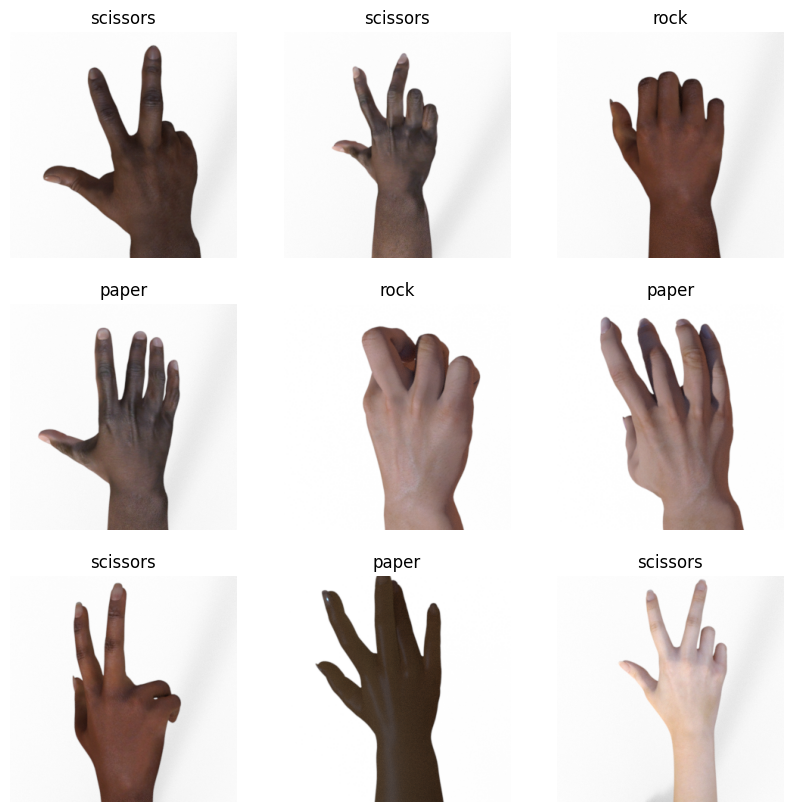

In [28]:
# Since this is a bit new, leaving in for some starter code :)
# Visualize some sample images
def show_images(dataset):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(9)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(info.features['label'].int2str(label))
        plt.axis("off")

show_images(train_data)

In [29]:
# Since this is a bit new, leaving in for some starter code :)
# Define data augmentation function
def augment(image, label):
    image = tf.image.resize(image, [150, 150])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)
    return image, label

# Apply data augmentation to the training dataset
train_data = train_data.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_data = train_data.map(lambda image, label: (image / 255.0, label), num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_data = val_data.map(lambda image, label: (tf.image.resize(image, [150, 150]) / 255.0, label))
test_data = test_data.map(lambda image, label: (tf.image.resize(image, [150, 150]) / 255.0, label))

# Shuffle and batch the datasets
train_data = train_data.shuffle(1000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_data = val_data.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Building the CNN Model

In [30]:
for images, labels in train_data.take(1):
    print("Train batch - images shape:", images.shape)
    print("Train batch - labels shape:", labels.shape)

for images, labels in val_data.take(1):
    print("Validation batch - images shape:", images.shape)
    print("Validation batch - labels shape:", labels.shape)

for images, labels in test_data.take(1):
    print("Test batch - images shape:", images.shape)
    print("Test batch - labels shape:", labels.shape)


Train batch - images shape: (32, 150, 150, 3)
Train batch - labels shape: (32,)
Validation batch - images shape: (32, 150, 150, 3)
Validation batch - labels shape: (32,)
Test batch - images shape: (32, 150, 150, 3)
Test batch - labels shape: (32,)


In [31]:
#Insert Code Here

IMG_SIZE = 150
NUM_CLASSES = 3  # 3 catogories

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation="softmax"),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,323 (610.64 KB)

 Trainable params: 156,323 (610.64 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, verbose=1),
]

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=callbacks,
    verbose=2
)


Epoch 1/15
63/63 - 17s - 265ms/step - accuracy: 0.3358 - loss: 1.1002 - val_accuracy: 0.3492 - val_loss: 1.1004 - learning_rate: 1.0000e-03
Epoch 2/15
63/63 - 1s - 14ms/step - accuracy: 0.3616 - loss: 1.0967 - val_accuracy: 0.3770 - val_loss: 1.0620 - learning_rate: 1.0000e-03
Epoch 3/15
63/63 - 1s - 14ms/step - accuracy: 0.3953 - loss: 1.0740 - val_accuracy: 0.4286 - val_loss: 1.0231 - learning_rate: 1.0000e-03
Epoch 4/15
63/63 - 1s - 14ms/step - accuracy: 0.4906 - loss: 0.9967 - val_accuracy: 0.4008 - val_loss: 1.1050 - learning_rate: 1.0000e-03
Epoch 5/15
63/63 - 1s - 14ms/step - accuracy: 0.5367 - loss: 0.9410 - val_accuracy: 0.6786 - val_loss: 0.7032 - learning_rate: 1.0000e-03
Epoch 6/15
63/63 - 1s - 14ms/step - accuracy: 0.7307 - loss: 0.6490 - val_accuracy: 0.9127 - val_loss: 0.3225 - learning_rate: 1.0000e-03
Epoch 7/15
63/63 - 1s - 14ms/step - accuracy: 0.8388 - loss: 0.4385 - val_accuracy: 0.9524 - val_loss: 0.2332 - learning_rate: 1.0000e-03
Epoch 8/15
63/63 - 1s - 14ms/ste

# Evaluating the Model

Test accuracy: 0.988
              precision    recall  f1-score   support

        rock     1.0000    0.9881    0.9940        84
       paper     1.0000    0.9762    0.9880        84
    scissors     0.9655    1.0000    0.9825        84

    accuracy                         0.9881       252
   macro avg     0.9885    0.9881    0.9881       252
weighted avg     0.9885    0.9881    0.9881       252



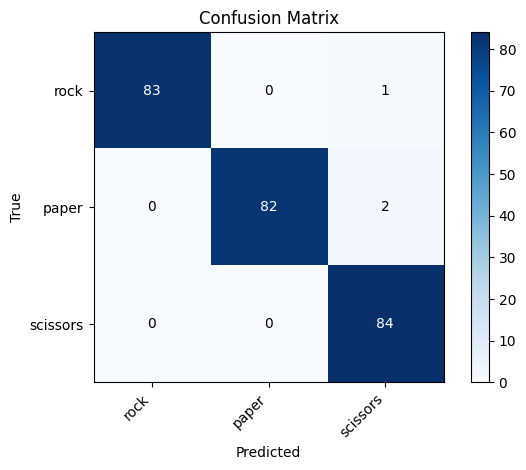

In [33]:
#Insert Code Here



# Accuracy from Keras
test_loss, test_acc = model.evaluate(test_data, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

# Collect predictions and true labels
y_true = []
y_prob = []
for images, labels in test_data:
    y_true.append(labels.numpy())
    y_prob.append(model.predict(images, verbose=0))
y_true = np.concatenate(y_true)
y_prob = np.concatenate(y_prob)
y_pred = y_prob.argmax(axis=1)

target_names = ["rock","paper","scissors"]
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Confusion matrix (plot)
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
ticks = np.arange(len(target_names))
plt.xticks(ticks, target_names, rotation=45, ha="right")
plt.yticks(ticks, target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i,j] > cm.max()/2 else "black")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout(); plt.show()


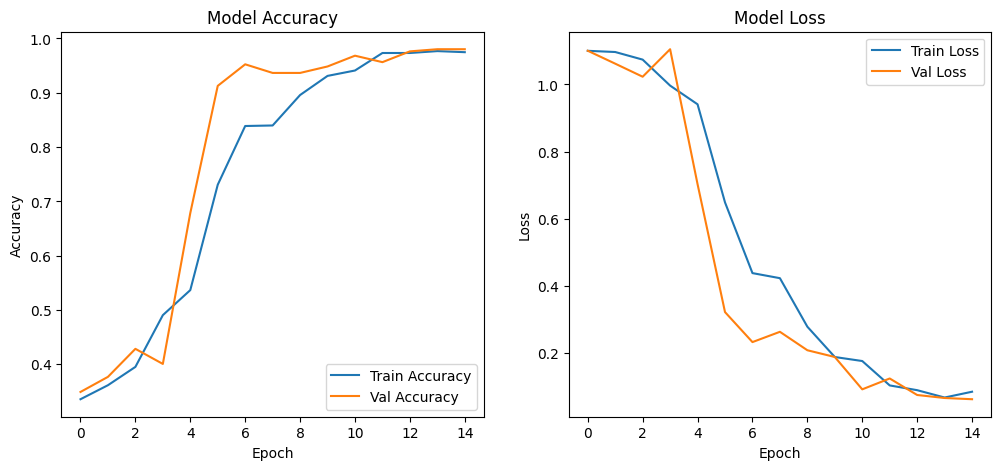

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



## For the Model Selection Project, you will STOP HERE!
During Units 4, 5, and 6, we will explore and learn additional techniques, and then revisit these projects to apply the below:
- Model evaluation and parameter tuning
- Explanatory visualizations and package your results with data storytelling

# Tuning Model Parameters (Completed in Unit 4)

In [ ]:
#Insert Code Here

# Evaluating the Tuned Model (Completed in Unit 4)

In [ ]:
# Since this is a bit new, leaving in for some starter code :)
# Be sure to update with your variable names, or remove and build from scratch
def preprocess_image(img_path, target_size=(150, 150)):
    """
    Preprocess the image to match the input shape expected by the model.

    Args:
    img_path (str): Path to the image file.
    target_size (tuple): Target size to resize the image.

    Returns:
    np.array: Preprocessed image.
    """
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_image_class(model, img_path, class_names):
    """
    Predict the class of the image using the trained model.

    Args:
    model (tf.keras.Model): Trained Keras model.
    img_path (str): Path to the image file.
    class_names (list): List of class names.

    Returns:
    str: Predicted class label.
    """
    preprocessed_img = preprocess_image(img_path)
    predictions = model.predict(preprocessed_img)
    predicted_class = np.argmax(predictions, axis=1)
    return class_names[predicted_class[0]]

# Define the class names
class_names = ['rock', 'paper', 'scissors']

# Path to the image you want to predict, update with your sample images or use the ones provided
#img_path = 'path_to_your_image.jpg'
img_path = 'rock_sample.png'
#img_path = 'paper_sample.png'
#img_path = 'scissors_sample.png'


# Predict the class
predicted_class = predict_image_class(model, img_path, class_names)
print(f"The predicted class is: {predicted_class}")

# Visualizing Results (Completed in Units 4 and 6)

In [ ]:
#Insert Code Here